In [13]:
# Download crash.csv from OA 6.10, which is an auto-accident dataset portal 
# for the USA  hosted by data.gov (crash data for individual states can be 
# searched). 
#
# The data contains  passengers’ (not necessarily the driver’s) 
# age (in years) and the speed of the vehicle (mph)  at the time of impact, 
# as well as the fate of the passengers (1 represents survived, 0 represents 
# did not survive) after the crash. 
#
# Use logistic regression to decide if the age and speed can predict the 
# survivability of the passenger. 

In [17]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score  
import matplotlib.pyplot as plt

# Import and print dataset for evaluation and preparation of data
df = pd.read_csv("../Datasets/Code_and_Data_(Chapter_06)/Code and Data (Chapter 06)/crash.csv", index_col="PassengerId")
# print (df)

X = df.drop(columns=['Survived'])
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

             Age  Speed  Survived
PassengerId                      
1             22     65         0
2             38     50         1
3             26     45         1
4             35     55         1
5             35     85         0
6             26    117         0
7             54     68         0
8             12     72         0
9             27     46         1
10            32     71         1
11            43     56         1
12            58     32         1
13            27     96         0
14            29     79         0
15            21     63         0
16            55     26         1
17             2     47         0
18            39     35         1
19            31     83         0
20             7     61         1


In [15]:
# Create the LR model, train it, and make some predictions
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)  
print(logmodel.summary())

# Evaluate the models performance
predictions = logmodel.predict(sm.add_constant(X_test)) 
binary_outcomes = [1 if x >= 0.5 else 0 for x in predictions] 

# Calculate and print accuracy and confusion matrix to evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, binary_outcomes))
print("Confusion Matrix:\n", confusion_matrix(y_test, binary_outcomes))

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                   14
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.6352
Time:                        15:12:16   Log-Likelihood:                -3.5403
converged:                       True   LL-Null:                       -9.7041
Covariance Type:            nonrobust   LLR p-value:                  0.002104
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5798      8.106      1.429      0.153      -4.308      27.468
Age            0.0362      0.114      0.319      0.750      -0.187       0.259
Speed         -0.1913      0.135     -1.419      0.1

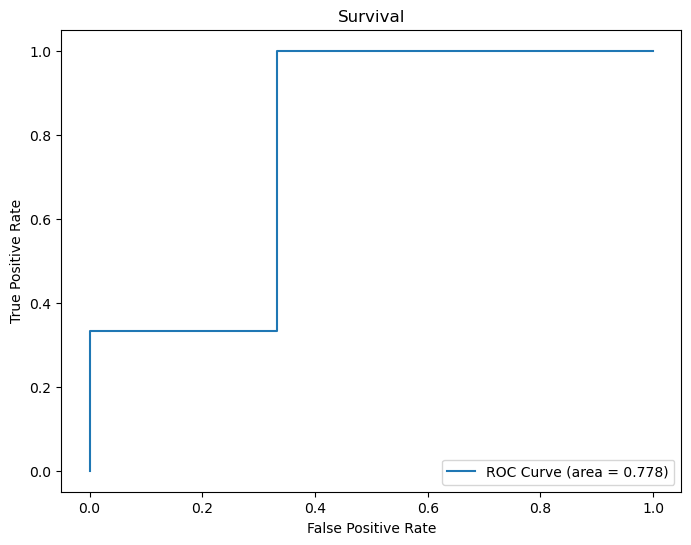

In [16]:
# Further investigate the models capabilites on discerning between classes
fpr, tpr, thresholds = roc_curve(y_test, predictions)  # Calculate False Positive Rate, True Positive Rate, and thresholds
roc_auc = roc_auc_score(y_test, predictions)  # Calculate the Area Under the Curve (AUC) for ROC

# Plotting ROC curve
plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.3f})') 
plt.title('Survival') 
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.legend(loc="lower right")  
plt.show() 